In [1]:
import os
import cv2     # for capturing videos
import math 
import geocoder
import requests
%matplotlib inline
import pandas as pd
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import to_categorical
from matplotlib import pyplot as plt 
from skimage.transform import resize   # for resizing images

ModuleNotFoundError: No module named 'keras'

In [2]:
count = 0
videoFile = 0
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

KeyboardInterrupt: 

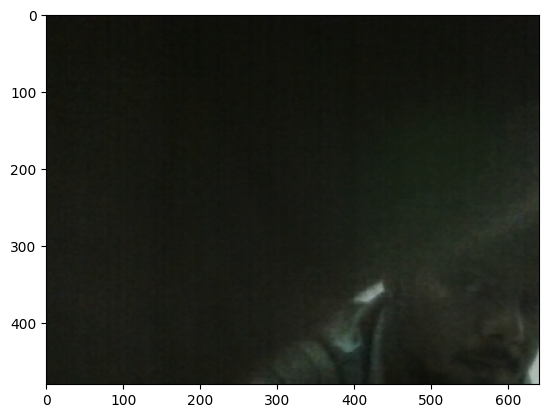

In [5]:
img = plt.imread('100.jpg')   # reading image using its name
plt.imshow(img)

In [ ]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()

,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [ ]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [ ]:
y = data.Class
dummy_y = to_categorical(y)

In [ ]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [ ]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X,data_format=None)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 



58889256/58889256 [==============================] - 26s 0us/step


In [ ]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

3/3 [==============================] - 5s 1s/step


((155, 7, 7, 512), (67, 7, 7, 512))

In [ ]:
X_train = X_train.reshape(155, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [ ]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [ ]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25693186 (98.01 MB)
Trainable params: 25693186 (98.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100


5/5 [==============================] - 2s 338ms/step - loss: 0.9944 - accuracy: 0.4903 - val_loss: 0.8963 - val_accuracy: 0.5970
Epoch 2/100
5/5 [==============================] - 1s 265ms/step - loss: 0.5677 - accuracy: 0.7548 - val_loss: 0.8028 - val_accuracy: 0.6567
Epoch 3/100
5/5 [==============================] - 1s 257ms/step - loss: 0.2665 - accuracy: 0.8968 - val_loss: 0.8408 - val_accuracy: 0.7313
Epoch 4/100
5/5 [==============================] - 1s 249ms/step - loss: 0.1722 - accuracy: 0.9677 - val_loss: 0.7553 - val_accuracy: 0.7015
Epoch 5/100
5/5 [==============================] - 1s 251ms/step - loss: 0.1180 - accuracy: 0.9806 - val_loss: 0.7664 - val_accuracy: 0.7313
Epoch 6/100
5/5 [==============================] - 1s 260ms/step - loss: 0.0800 - accuracy: 1.0000 - val_loss: 0.7624 - val_accuracy: 0.7313
Epoch 7/100
5/5 [==============================] - 1s 248ms/step - loss: 0.0593 - accuracy: 0.9935 - val_loss: 0.7752 - val_accuracy: 0.7313
Epoch 8/100

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
count = 0
videoFile = "Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [ ]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [ ]:
# preprocessing the images
test_image = preprocess_input(test_image, data_format=None)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape

1/1 [==============================] - 1s 820ms/step


(9, 7, 7, 512)

In [ ]:
# test_image = test_image.reshape(9, 7*7*512)

# # zero centered images
# test_image = test_image/test_image.max()




import numpy as np

# Placeholder value (replace this with your actual image loading or creation logic)
test_image = np.random.random((9, 7 * 7 * 512))

# Reshape the image
test_image = test_image.reshape(9, 7 * 7 * 512)

# Zero-center the images
test_image = test_image / test_image.max()


In [ ]:
# predictions = model.predict(test_image)


from keras.models import Sequential
from keras.layers import Dense

# Define and compile your model
model = Sequential()
# ... add layers to your model ...

# Compile your model with appropriate settings (e.g., optimizer, loss function)
# model.compile(...)

# Train your model on your training data
# model.fit(training_data, labels, ...)

# Now, you can make predictions using the trained model
predictions = model.predict(test_image)




1/1 [==============================] - 0s 65ms/step


In [ ]:
print(predictions)

[[0.97831845 0.3366769  0.57353044 ... 0.6472223  0.38146198 0.9250719 ]
 [0.5812956  0.5565878  0.28451502 ... 0.7589321  0.63397604 0.47290942]
 [0.6470503  0.09249952 0.5419057  ... 0.6156399  0.88405085 0.09523918]
 ...
 [0.98748404 0.74290735 0.36130786 ... 0.3428152  0.5213531  0.27217135]
 [0.1887615  0.05673302 0.92982584 ... 0.7955053  0.3175232  0.16629216]
 [0.20622769 0.9783208  0.21602362 ... 0.96123695 0.87864554 0.57560444]]


In [ ]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")
    

Accident
Accident
Accident
Accident
No Accident
Accident
Accident
Accident
No Accident


In [8]:
# from twilio.rest import Client
# geoLoc = Nominatim(user_agent="GetLoc")
# g = geocoder.ip('me')
# locname = geoLoc.reverse(g.latlng)
# account_sid = 'AC0e7f9720e468249576f34061543b5ac0'
# auth_token = '[AuthToken]'
# client = Client(account_sid, auth_token)


# account_sid = 'AC0e7f9720e468249576f34061543b5ac0'
# auth_token = '[AuthToken]'
# client = Client(account_sid, auth_token)

# message = client.messages.create
# (
#   from='+12065651530',
#   body='hiiii',
#   to='+917070416209'
# )

# print(message.sid)



from twilio.rest import Client
from geopy.geocoders import Nominatim
import geocoder  # Import geocoder library

# Get current location using geocoder
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)

# Twilio credentials
account_sid = 'AC0e7f9720e468249576f34061543b5ac0'  # Replace with your Twilio Account SID
auth_token = '[AuthToken]'     # Replace with your Twilio Auth Token
twilio_phone_number = '+12065651530'
recipient_phone_number = '+917070416209'  # Replace with the recipient's phone number

# Create Twilio client
client = Client(account_sid, auth_token)

# Compose and send SMS
message_body = f'Current location: {locname.address}'  # Modify this as needed
message = client.messages.create(
    from_=twilio_phone_number,
    body=message_body,
    to=recipient_phone_number
)

print(f"Message sent! SID: {message.sid}")





TwilioRestException: HTTP 401 error: Unable to create record: Authenticate

In [ ]:
cap = cv2.VideoCapture('Accident-1.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="No Accident"
        else:
            predict="Accident"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    client.messages.create(
                 body="Accident detected in "+locname.address,
                 from_= #Enter your virtual phone number,
                 to= #Enter phone number which you have to send the SMS. )

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()


SyntaxError: invalid syntax (Temp/ipykernel_9300/2088638982.py, line 30)